In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from glob import glob

In [ ]:
!ls ../no_sampling_output/230110*.txt

ls: cannot access '../no_sampling_output/230119*.txt': No such file or directory


In [86]:
output_data = sorted(glob("../no_sampling_output/230110*.txt"),key=lambda x : x.split('_teston_')[1])
output_data

['230110_PGE_Net_RawRGB_trainon_alpha_0.01_beta_0.0002_teston_alpha_0.01_beta_0.0002_alpha_sigma_estimated_gaussian.txt',
 '230110_PGE_Net_RawRGB_trainon_alpha_0.05_beta_0.02_teston_alpha_0.01_beta_0.0002_alpha_sigma_estimated_gaussian.txt',
 '230110_PGE_Net_RawRGB_trainon_alpha_0.01_beta_0.02_teston_alpha_0.01_beta_0.0002_alpha_sigma_estimated_gaussian.txt',
 '230110_PGE_Net_RawRGB_trainon_random_noise_teston_alpha_0.01_beta_0.0002_alpha_sigma_estimated_gaussian.txt',
 '230110_PGE_Net_RawRGB_trainon_alpha_0.01_beta_0.0002_teston_alpha_0.01_beta_0.02_alpha_sigma_estimated_gaussian.txt',
 '230110_PGE_Net_RawRGB_trainon_alpha_0.05_beta_0.02_teston_alpha_0.01_beta_0.02_alpha_sigma_estimated_gaussian.txt',
 '230110_PGE_Net_RawRGB_trainon_random_noise_teston_alpha_0.01_beta_0.02_alpha_sigma_estimated_gaussian.txt',
 '230110_PGE_Net_RawRGB_trainon_alpha_0.01_beta_0.02_teston_alpha_0.01_beta_0.02_alpha_sigma_estimated_gaussian.txt',
 '230110_PGE_Net_RawRGB_trainon_random_noise_teston_alpha_0.

0 alpha_0.01_beta_0.0002


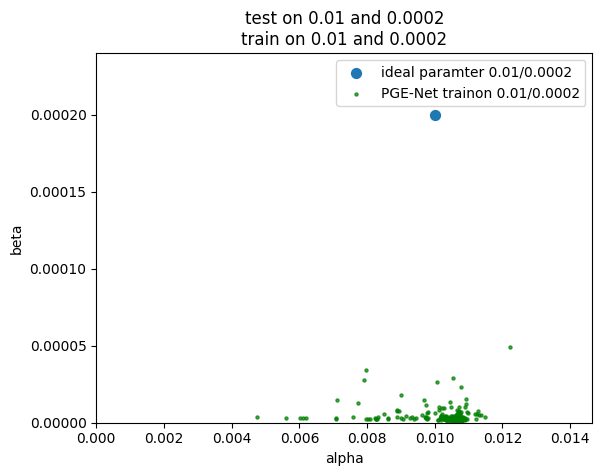

1 alpha_0.01_beta_0.02


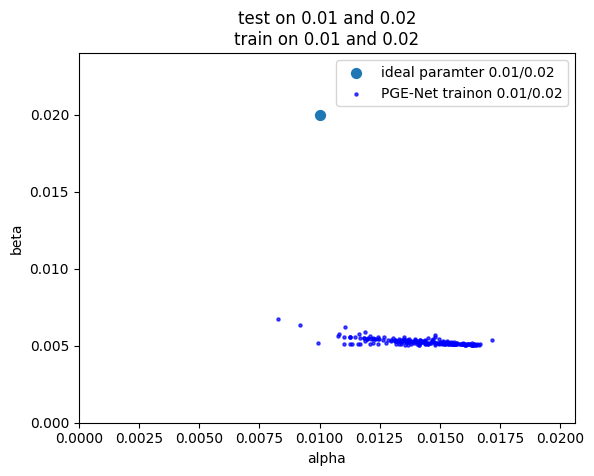

2 alpha_0.05_beta_0.02


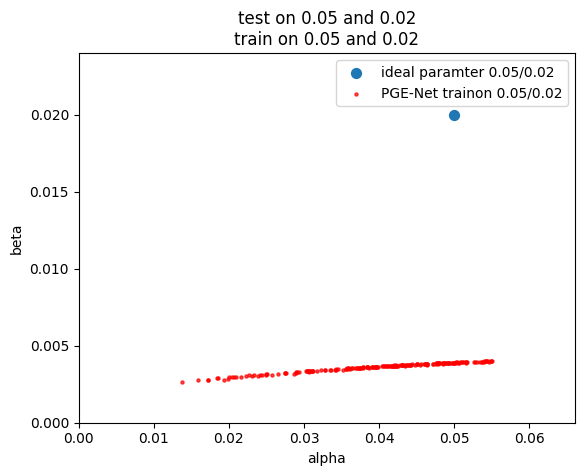

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


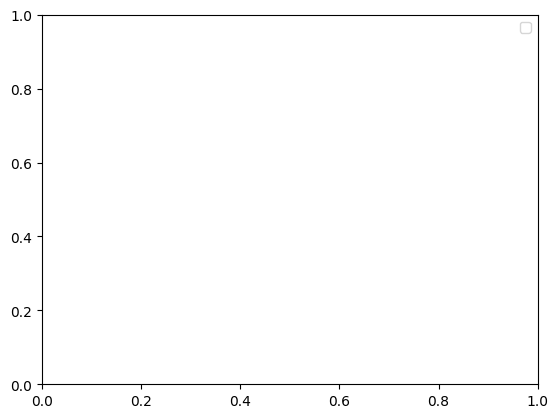

In [132]:
idx = 0
# color_list = ['green','red','orange','blue']
color_list = ['green','blue','orange']
x_max,y_max = 0,0
for filename in sorted(glob("../no_sampling_output/230110*.txt"),key=lambda x : x.split('_teston_')[1]):
    parameter = filename.split("trainon_")[1]
    # print(parameter)
    trainon_parameter = parameter.split('_teston')[0]
    if trainon_parameter[:6] != 'random':
        trainon_alpha,trainon_beta = float(trainon_parameter.split("_")[1]),float(trainon_parameter.split("_")[3])
    teston_parameter = parameter.split('_teston_')[1].split('_alpha_sigma')[0]
    if teston_parameter[:6] != 'random':
        teston_alpha,teston_beta = float(teston_parameter.split("_")[1]),float(teston_parameter.split("_")[3])
    if trainon_parameter[:6] != 'random' and teston_parameter[:6] != 'random':
        if teston_alpha != trainon_alpha or teston_beta != trainon_beta :
            continue
    else :
        continue
    output = np.loadtxt(filename)
    alpha, beta, estimated_gaussian = output[:,0],output[:,1],output[:,2]
    print(idx,trainon_parameter)
    x_max,y_max = max(max(alpha),teston_alpha), max(max(beta),teston_beta)
    x_max,y_max = x_max*1.2,y_max*1.2       
    label_str = f"{trainon_alpha}/{trainon_beta}"
    if trainon_parameter[:6] == 'random':
        label_str='random'
    plt.title(f"test on {teston_alpha} and {teston_beta}\ntrain on {trainon_alpha} and {trainon_beta}")
    plt.scatter(teston_alpha,teston_beta, #c=color_list[idx%3],
            label=f'ideal paramter {teston_alpha}/{teston_beta}',
           s=50)
    plt.scatter(alpha,beta,c=color_list[idx%4], label=f'PGE-Net trainon {label_str}',#teston_parameter,
               alpha=0.7,s=5)

    plt.xlim(0,(x_max))
    plt.ylim(0,(y_max))
    plt.xlabel('alpha')
    plt.ylabel('beta')
    plt.legend()
    plt.pause(0.01) 
    x_max,y_max = 0,0
    idx+=1
plt.legend()

0 alpha_0.01_beta_0.0002
1 alpha_0.05_beta_0.02
2 alpha_0.01_beta_0.02
3 random_noise
4 alpha_0.01_beta_0.0002


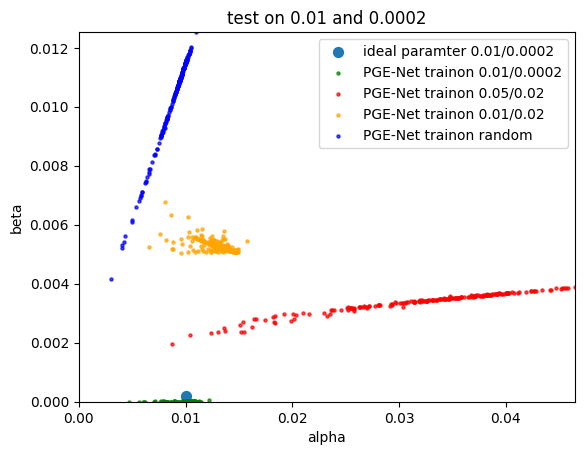

5 alpha_0.05_beta_0.02
6 random_noise
7 alpha_0.01_beta_0.02
8 random_noise


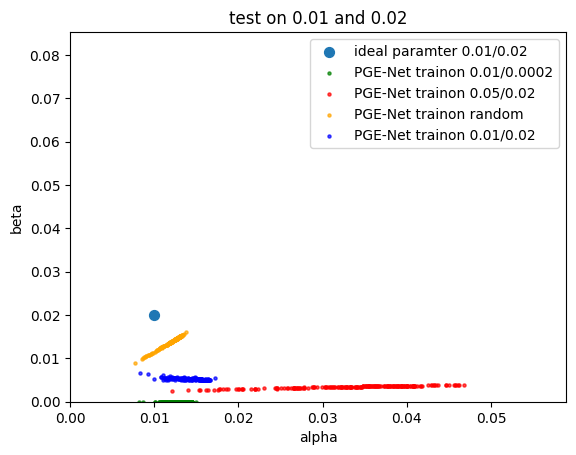

9 alpha_0.01_beta_0.02
10 alpha_0.05_beta_0.02
11 alpha_0.01_beta_0.0002


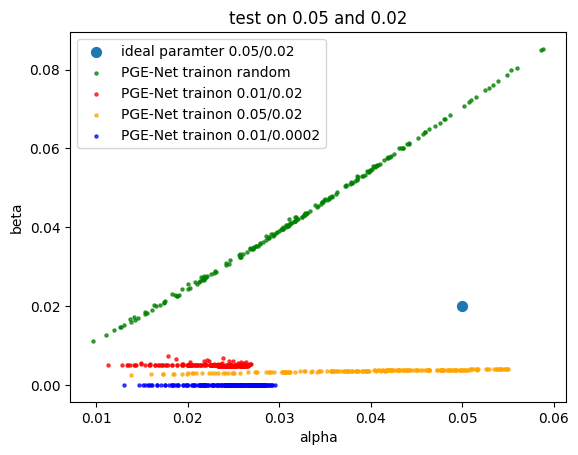

In [120]:
idx = 0
color_list = ['green','red','orange','blue']
x_max,y_max = 0,0
for filename in sorted(glob("../no_sampling_output/230110*.txt"),key=lambda x : x.split('_teston_')[1]):
    parameter = filename.split("trainon_")[1]
    # print(parameter)
    trainon_parameter = parameter.split('_teston')[0]
    if trainon_parameter[:6] != 'random':
        trainon_alpha,trainon_beta = float(trainon_parameter.split("_")[1]),float(trainon_parameter.split("_")[3])
    teston_parameter = parameter.split('_teston_')[1].split('_alpha_sigma')[0]
    if teston_parameter[:6] != 'random':
        teston_alpha,teston_beta = float(teston_parameter.split("_")[1]),float(teston_parameter.split("_")[3])
    
    output = np.loadtxt(filename)
    alpha, beta, estimated_gaussian = output[:,0],output[:,1],output[:,2]
    print(idx,trainon_parameter)
    x_max,y_max = max(max(alpha),x_max), max(max(beta),y_max)
    if idx %4  == 0:
        if idx != 0 :
            
            plt.xlim(0,(x_max))
            plt.ylim(0,(y_max))
            plt.legend()
            plt.pause(0.01) 
            x_max,y_max = 0,0
        # plt.title(f"train on {trainon_alpha} and {trainon_beta}")
        plt.title(f"test on {teston_alpha} and {teston_beta}")
        plt.scatter(teston_alpha,teston_beta, #c=color_list[idx%3],
                label=f'ideal paramter {teston_alpha}/{teston_beta}',
               s=50)
        plt.xlabel('alpha')
        plt.ylabel('beta')
    # print(teston_alpha,teston_beta)
    # plt.scatter(teston_alpha,teston_beta, #c=color_list[idx%3],
    #            facecolors='none',edgecolor=color_list[idx%3], #label=f'original paramter {teston_alpha}/{teston_beta}',
    #            s=50)
    label_str = f"{trainon_alpha}/{trainon_beta}"
    if trainon_parameter[:6] == 'random':
        label_str='random'
    plt.scatter(alpha,beta,c=color_list[idx%4], label=f'PGE-Net trainon {label_str}',#teston_parameter,
               alpha=0.7,s=5)
    # plt.xscale('symlog')
    #plt.yscale('symlog')
    # plt.xlim(0,(teston_alpha)*3)
    # plt.ylim(0,0.03)
    #plt.ylim(0,0.0002)
    idx +=1
plt.legend()

(0.0, 0.0004)

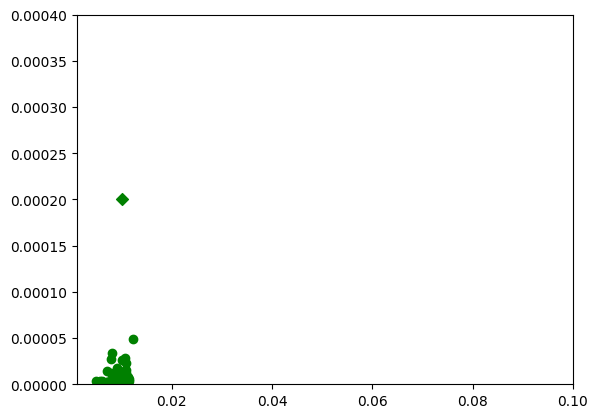

In [39]:
plt.
output = np.loadtxt("./no_sampling_output/230110_PGE_Net_RawRGB_trainon_alpha_0.01_beta_0.0002_teston_alpha_0.01_beta_0.0002_alpha_sigma_estimated_gaussian.txt")
# output : alpha, beta, estimated_gaussian
alpha, beta, estimated_gaussian = output[:,0],output[:,1],output[:,2]
plt.scatter(0.01,0.0002,c='green',marker='D')
plt.scatter(alpha,beta,c='green')
plt.xlim(0.001,0.1)
plt.ylim(0,0.0004)